<a href="https://colab.research.google.com/github/arosales23/CIS-3902-AI-ML-ARA/blob/main/Data_Cleaning_Exercise_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning in Python — Exercise

**Course:** Intro to Data Mining  
**Dataset:** Heart Failure Prediction dataset (loaded from a public URL — no file downloads needed!)  

---


# YOUR TURN: Practice Exercise

Now apply the same data cleaning pipeline from the Titanic exercise to a **new dataset**: the **Heart Failure Prediction** dataset.

This dataset combines 5 heart disease databases (918 patients total) and contains medical information about patients and whether or not they have heart disease. It has **text columns that need encoding**, potential outliers, and some tricky data quality issues — perfect for practicing everything we just learned.

**Your tasks** (follow the same steps from above):

1. Load the data and take a first look
2. Understand the data types and structure
3. Get descriptive statistics
4. Check for duplicates
5. Handle missing values (decide: drop column, drop row, or impute?)
6. Encode any categorical (`object`) columns
7. Detect and handle outliers
8. Scale the numerical features

The starter code below loads the dataset for you. The rest is up to you!

> **Hints:** Pay close attention to `.describe()` — not all missing values show up as NaN! Also, this dataset was made by combining multiple hospital databases, so check for duplicates.

### About the Heart Failure Prediction Dataset

| Column | Description | Type |
|--------|-------------|------|
| Age | Age in years | Numerical |
| Sex | M = Male, F = Female | Categorical |
| ChestPainType | TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic | Categorical |
| RestingBP | Resting blood pressure (mm Hg) | Numerical |
| Cholesterol | Serum cholesterol (mg/dl) | Numerical |
| FastingBS | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) | Numerical |
| RestingECG | Normal, ST = ST-T wave abnormality, LVH = left ventricular hypertrophy | Categorical |
| MaxHR | Maximum heart rate achieved | Numerical |
| ExerciseAngina | Y = Yes, N = No | Categorical |
| Oldpeak | ST depression induced by exercise | Numerical |
| ST_Slope | Up = upsloping, Flat = flat, Down = downsloping | Categorical |
| HeartDisease | 1 = heart disease, 0 = no heart disease (TARGET) | Numerical |

### Step 1: Load the data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# The Heart Failure Prediction dataset — loaded from a public GitHub URL
# (Originally from Kaggle, combining 5 UCI heart disease databases)
url = 'https://raw.githubusercontent.com/xpy-10/DataSet/main/heart.csv'

heart = pd.read_csv(url)

print(f'Dataset shape: {heart.shape[0]} rows x {heart.shape[1]} columns')
heart.head(15)

Dataset shape: 918 rows x 12 columns


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


### Step 2: Check data types and structure

Use `.info()` to see the data types and count non-null values.

In [13]:
# YOUR CODE HERE
# Hint: heart.info()
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


### Step 3: Descriptive statistics

Use `.describe()`. Look for anything surprising in the min, max, or mean values.

In [14]:
# YOUR CODE HERE
# Hint: heart.describe()
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Step 4: Check for duplicates

How many duplicate rows are there? If any, remove them.

In [15]:
# YOUR CODE HERE
# Hint: heart.duplicated().sum()
# To remove: heart = heart.drop_duplicates()
heart.duplicated().sum()
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Step 5: Handle missing values

Check the percentage of missing values per column. Then decide what to do:
- Drop columns that are mostly missing
- Drop rows if very few are missing
- Impute (fill) with mean or median if a moderate amount is missing

In [16]:
# YOUR CODE HERE
# Step 1: Find missing value percentages
# Hint: (heart.isnull().sum() / len(heart)) * 100
missing_val = (heart.isnull().sum() / len(heart)) * 100
resting_bp_zeros = (heart['RestingBP'] == 0).sum()
print(missing_val)
print()
print(f"Number of RestingBP values that are 0: {resting_bp_zeros}")
print()
# Step 2: Decide and apply your strategy for each column with missing values
print(f'Resting BP mean: {heart['RestingBP'].mean():.1f}')
median_RBP = heart['RestingBP'].median()
print("Resting Heart BP median:", median_RBP)
heart['RestingBP'] = heart['RestingBP'].replace(0, median_RBP)
print("Resting BP 0s:", resting_bp_zeros)

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

Number of RestingBP values that are 0: 1

Resting BP mean: 132.4
Resting Heart BP median: 130.0
Resting BP 0s: 1


### Step 6: Encode categorical variables

Check if any columns are `object` type. If so, decide whether to use label encoding or one-hot encoding.

Hint: Look at `.info()` output — how many unique values does each `object` column have?

In [17]:
# YOUR CODE HERE
# Hint: Check for object columns with:
# heart.select_dtypes(include='object').columns
heart.select_dtypes(include='object').columns
# For 2 categories: heart['col'] = heart['col'].map({'val1': 0, 'val2': 1})
heart['Sex'] = heart['Sex'].map({'M': 0, 'F': 1})
heart['RestingECG'] = heart['RestingECG'].map({'Normal': 0, 'ST': 1})
heart['ExerciseAngina'] = heart['ExerciseAngina'].map({'N': 0, 'Y': 1})
heart['ST_Slope'] = heart['ST_Slope'].map({'Flat': 0, 'Up': 1})
# For 3+ categories: heart = pd.get_dummies(heart, columns=['col'], drop_first=True)
heart = pd.get_dummies(heart, columns=['ChestPainType'], drop_first=True)
# Think about which columns have 2 categories vs. 3+ categories
heart.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,0,140,289,0,0.0,172,0,0.0,1.0,0,True,False,False
1,49,1,160,180,0,0.0,156,0,1.0,0.0,1,False,True,False
2,37,0,130,283,0,1.0,98,0,0.0,1.0,0,True,False,False
3,48,1,138,214,0,0.0,108,1,1.5,0.0,1,False,False,False
4,54,0,150,195,0,0.0,122,0,0.0,1.0,0,False,True,False


### Step 7: Detect and handle outliers

Pick 2-3 numerical columns (e.g., `trestbps`, `chol`, `thalach`). Create box plots and use the IQR method.

Remember: think about whether outliers are real data or errors before removing them!

RestingBP:
  Q1 = 120.00, Q3 = 140.00, IQR = 20.00
  Lower bound = 90.00, Upper bound = 170.00
  Number of outliers: 27 (2.9%)

Cholesterol:
  Q1 = 173.25, Q3 = 267.00, IQR = 93.75
  Lower bound = 32.62, Upper bound = 407.62
  Number of outliers: 183 (19.9%)

Rows before removing RestingBPS outliers: 918
Rows after: 891
Rows before removing Cholesterol outliers: 891
Rows after: 715


/tmp/ipython-input-3909/3623761797.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heart = heart[~chol_outliers]


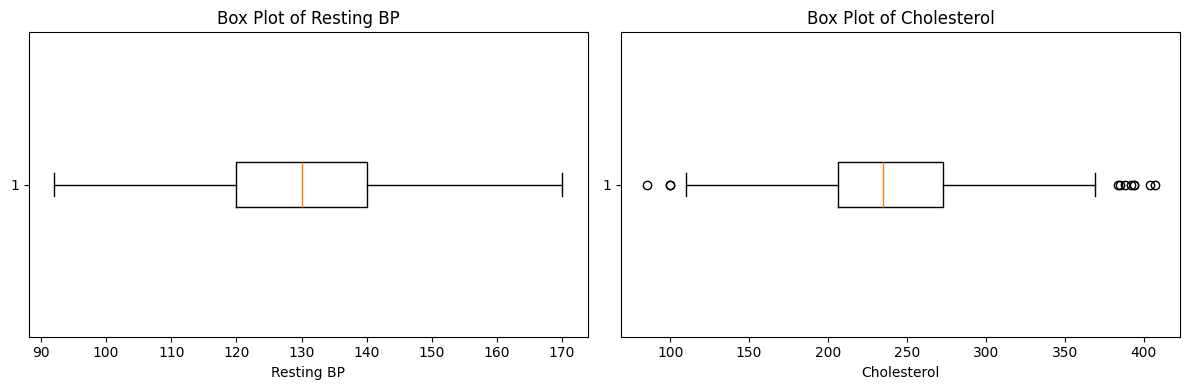

In [18]:
def detect_outliers_iqr(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
  print(f'{column}:')
  print(f'  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}')
  print(f'  Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}')
  print(f'  Number of outliers: {outliers.sum()} ({outliers.sum()/len(data)*100:.1f}%)')
  return outliers

restbps_outliers = detect_outliers_iqr(heart, 'RestingBP')
print()
chol_outliers = detect_outliers_iqr(heart, 'Cholesterol')
print()
# Hint: You can reuse the detect_outliers_iqr function from above
# Then create box plots with plt.boxplot()
print(f'Rows before removing RestingBPS outliers: {len(heart)}')
heart = heart[~restbps_outliers]
print(f'Rows after: {len(heart)}')

print(f'Rows before removing Cholesterol outliers: {len(heart)}')
heart = heart[~chol_outliers]
print(f'Rows after: {len(heart)}')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].boxplot(heart['RestingBP'], vert=False)
axes[0].set_xlabel('Resting BP')
axes[0].set_title('Box Plot of Resting BP')

axes[1].boxplot(heart['Cholesterol'], vert=False)
axes[1].set_xlabel('Cholesterol')
axes[1].set_title('Box Plot of Cholesterol')

plt.tight_layout()
plt.show()

### Step 8: Scale the numerical features

Apply Min-Max scaling to the numerical columns (not the target column).

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Hint: Follow the same pattern from Section 8 of the tutorial
num_cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'HeartDisease']

heart_scaled = heart.copy()

scaler = MinMaxScaler()
heart_scaled[num_cols_to_scale] = scaler.fit_transform(heart_scaled[num_cols_to_scale])

print('Scaled data (first 5 rows):')
heart_scaled.head()

Scaled data (first 5 rows):


,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,0.244898,0,0.615385,0.633540,0.0,0.0,0.770992,0,0.0,1.0,0.0,True,False,False
1,0.428571,1,0.871795,0.295031,0.0,0.0,0.648855,0,1.0,0.0,1.0,False,True,False
2,0.183673,0,0.487179,0.614907,0.0,1.0,0.206107,0,0.0,1.0,0.0,True,False,False
3,0.408163,1,0.589744,0.400621,0.0,0.0,0.282443,1,1.5,0.0,1.0,False,False,False
4,0.530612,0,0.743590,0.341615,0.0,0.0,0.389313,0,0.0,1.0,0.0,False,True,False


### Reflection Questions

After completing the exercise, answer these questions (add a text cell or answer here):

1. How did the Heart Disease dataset compare to the Titanic dataset in terms of data quality?

There are less missing values in the Heart Disease dataset than in the Titanic dataset, meaning that there is more data to work with.

2. Which missing value strategy did you use, and why?

I used the median to replace missing values because the data had multiple outliers.

3. Did you find any outliers? Did you remove them? Why or why not?

There were outliers in the data. I removed them because they were more on the extreme side of the data.

4. If you were building a model to predict heart disease, which columns do you think would be most important?

I believe the Age and Sex columns are some of the most important columns in the dataset because there might be a correlation between heart health and Age and Sex.

---
*Great work! You now have hands-on experience with a complete data cleaning pipeline.* Dr. Thompson